First few rows of the dataset:
   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 n

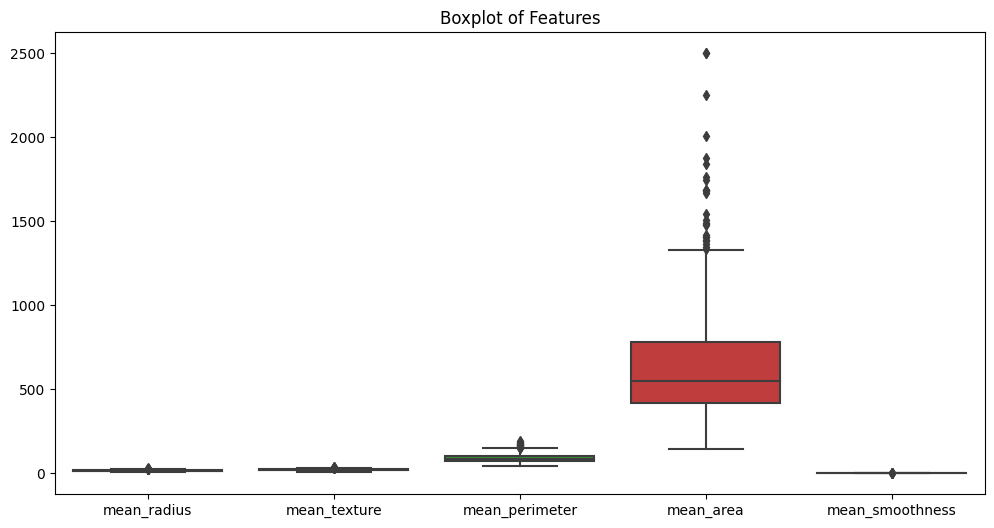


Outliers:
     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
259       15.530         33.56          103.70      744.9          0.10630   
3         11.420         20.38           77.58      386.1          0.14250   
520        9.295         13.90           59.96      257.8          0.13710   
521       24.630         21.60          165.50     1841.0          0.10300   
265       20.730         31.12          135.70     1419.0          0.09469   
393       21.610         22.28          144.40     1407.0          0.11670   
272       21.750         20.99          147.30     1491.0          0.09401   
23        21.160         23.04          137.20     1404.0          0.09428   
164       23.270         22.04          152.10     1686.0          0.08439   
562       15.220         30.62          103.40      716.9          0.10480   
563       20.920         25.09          143.00     1347.0          0.10990   
180       27.220         21.87          182.10     22

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Importing the dataset
file_path = r'C:\Babbaljeet_Kaur_Sidhu_4200354\Breast_cancer_data.xlsx'
df = pd.read_excel(file_path)

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Exploring the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Checking missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking outliers and printing them
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('diagnosis', axis=1))
plt.title("Boxplot of Features")
plt.show()

# Identifying and printing outliers
def find_outliers(data):
    outliers = []
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers.extend(column_outliers.index.tolist())
    return list(set(outliers))

outlier_indices = find_outliers(df.drop('diagnosis', axis=1))
outliers_df = df.loc[outlier_indices]

print("\nOutliers:")
print(outliers_df)


# Apply Winsorizing to take care of the outliers

In [11]:
from scipy.stats.mstats import winsorize

# Winsorizing example
df_winsorized = df.copy()
for column in df_winsorized.columns[:-1]:
    df_winsorized[column] = winsorize(df_winsorized[column], limits=[0.05, 0.05])


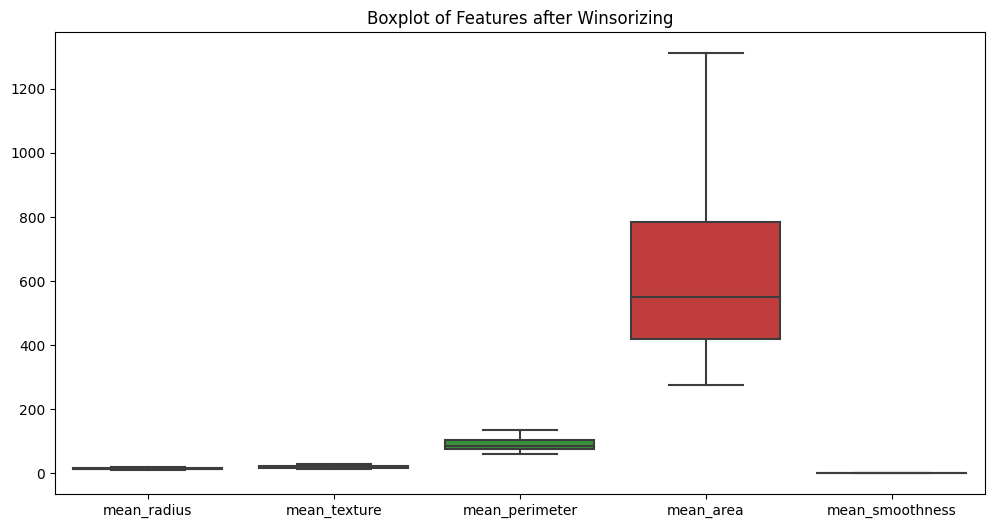


Outliers after Winsorizing:
Empty DataFrame
Columns: [mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness, diagnosis]
Index: []


In [12]:
# Checking outliers after Winsorizing
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_winsorized.drop('diagnosis', axis=1))
plt.title("Boxplot of Features after Winsorizing")
plt.show()

# Identifying and printing outliers after Winsorizing
outlier_indices_after_winsorizing = find_outliers(df_winsorized.drop('diagnosis', axis=1))
outliers_df_after_winsorizing = df_winsorized.loc[outlier_indices_after_winsorizing]

print("\nOutliers after Winsorizing:")
print(outliers_df_after_winsorizing)


# Data Visualization

# Class Distribution

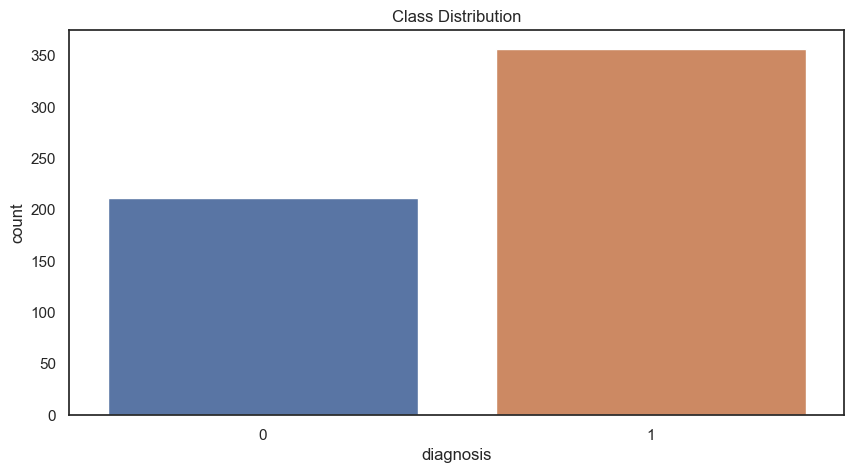


Class Distribution Values:
diagnosis
1    357
0    212
Name: count, dtype: int64


In [37]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution')
plt.show()

# Print values for class distribution
print("\nClass Distribution Values:")
print(df['diagnosis'].value_counts())


# Balancing Class Distribution

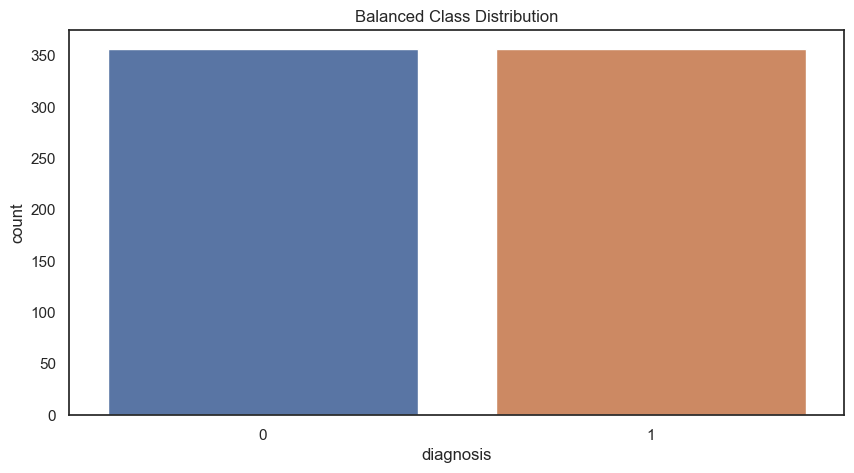


Balanced Class Distribution Values:
diagnosis
0    357
1    357
Name: count, dtype: int64


In [38]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


# Balancing the class distribution
class_0 = df[df['diagnosis'] == 0]
class_1 = df[df['diagnosis'] == 1]

# Upsample minority class (diagnosis = 0)
class_0_upsampled = resample(class_0, replace=True, n_samples=len(class_1), random_state=42)

# Combine the upsampled minority class with the original majority class
df_balanced = pd.concat([class_0_upsampled, class_1])

# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='diagnosis', data=df_balanced)
plt.title('Balanced Class Distribution')
plt.show()

# Print values for balanced class distribution
print("\nBalanced Class Distribution Values:")
print(df_balanced['diagnosis'].value_counts())


# Pairplot to visualize relationships between feature

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


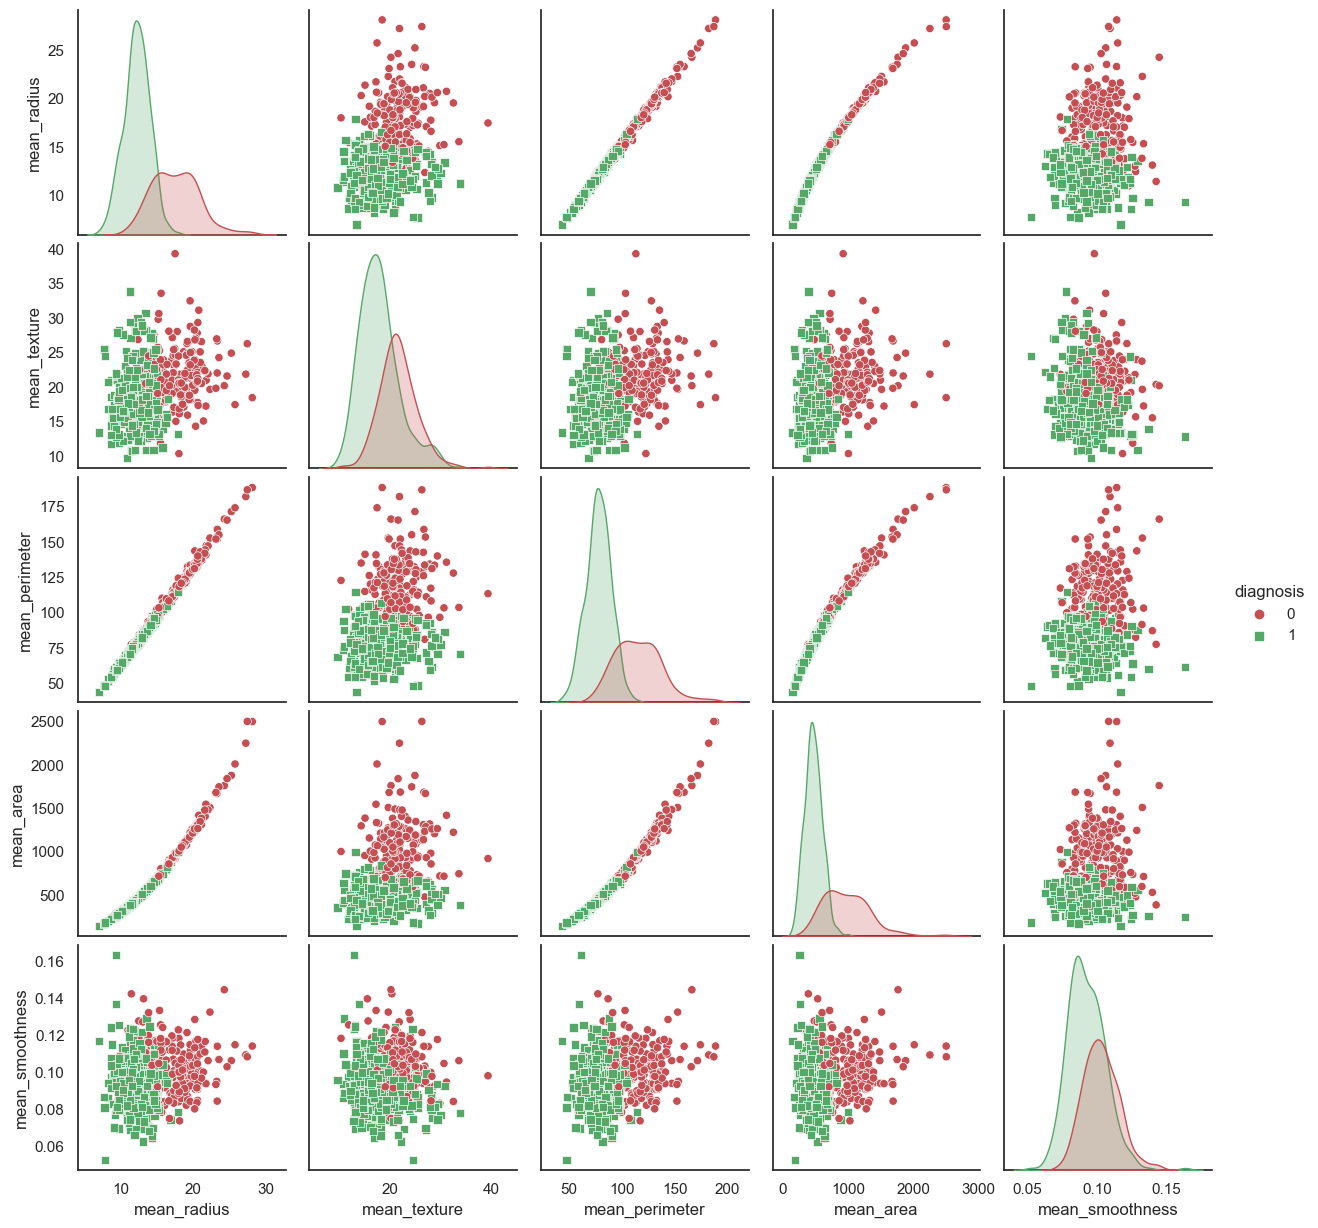

In [41]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Pairplot to visualize relationships between features
sns.set(style="white")
pairplot = sns.pairplot(df, hue='diagnosis', diag_kind='kde', markers=["o", "s"], palette={0: 'r', 1: 'g'})


# Correlation Heatmap


Correlation Matrix:
                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000      0.323782        0.997855   0.987357   
mean_texture        0.323782      1.000000        0.329533   0.321086   
mean_perimeter      0.997855      0.329533        1.000000   0.986507   
mean_area           0.987357      0.321086        0.986507   1.000000   
mean_smoothness     0.170581     -0.023389        0.207278   0.177028   
diagnosis          -0.730029     -0.415185       -0.742636  -0.708984   

                 mean_smoothness  diagnosis  
mean_radius             0.170581  -0.730029  
mean_texture           -0.023389  -0.415185  
mean_perimeter          0.207278  -0.742636  
mean_area               0.177028  -0.708984  
mean_smoothness         1.000000  -0.358560  
diagnosis              -0.358560   1.000000  


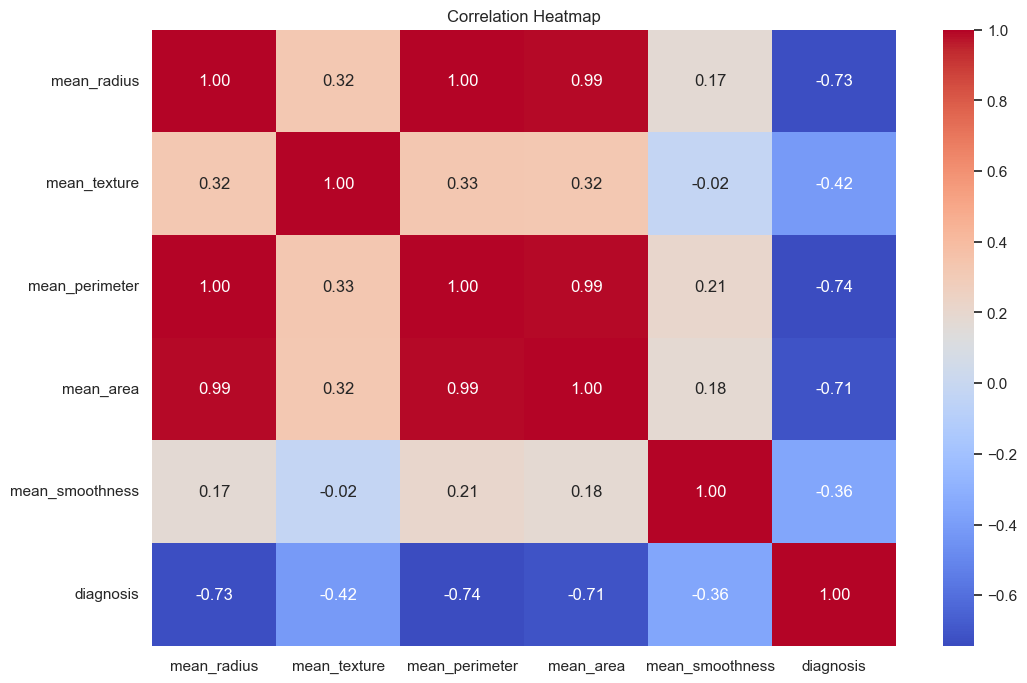

In [20]:
# Print correlation values
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# # Distribution plots and boxplots for each feature by diagnosis

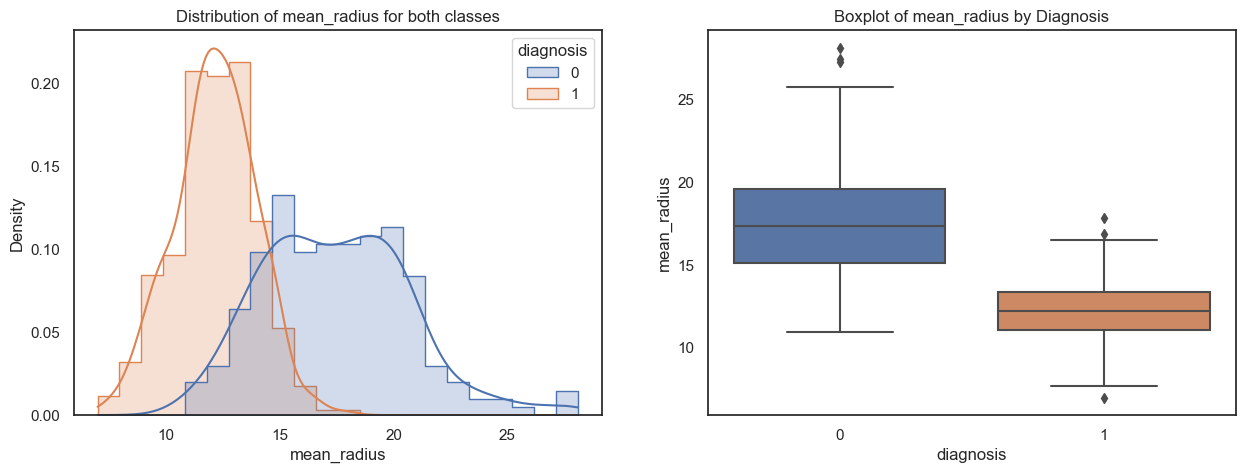


Values for mean_radius by Diagnosis:
           count       mean       std     min     25%     50%    75%    max
diagnosis                                                                  
0          212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11
1          357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85


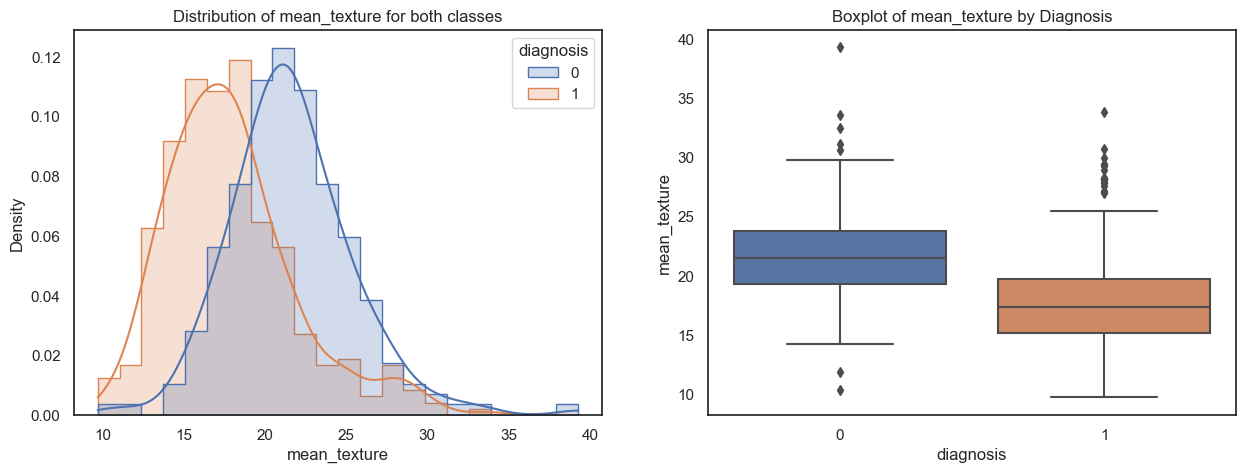


Values for mean_texture by Diagnosis:
           count       mean       std    min      25%    50%     75%    max
diagnosis                                                                  
0          212.0  21.604906  3.779470  10.38  19.3275  21.46  23.765  39.28
1          357.0  17.914762  3.995125   9.71  15.1500  17.39  19.760  33.81


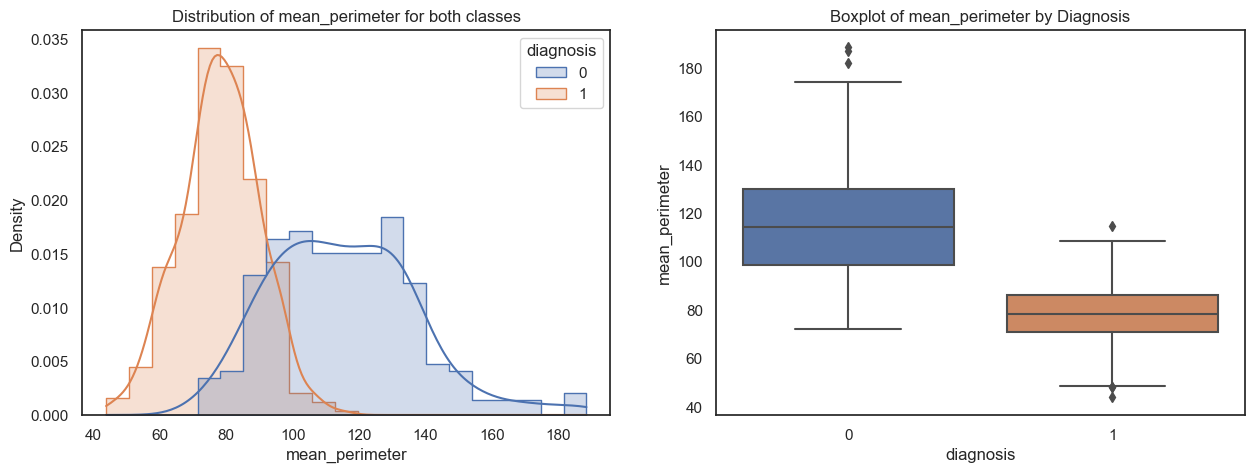


Values for mean_perimeter by Diagnosis:
           count        mean        std    min     25%     50%      75%    max
diagnosis                                                                     
0          212.0  115.365377  21.854653  71.90  98.745  114.20  129.925  188.5
1          357.0   78.075406  11.807438  43.79  70.870   78.18   86.100  114.6


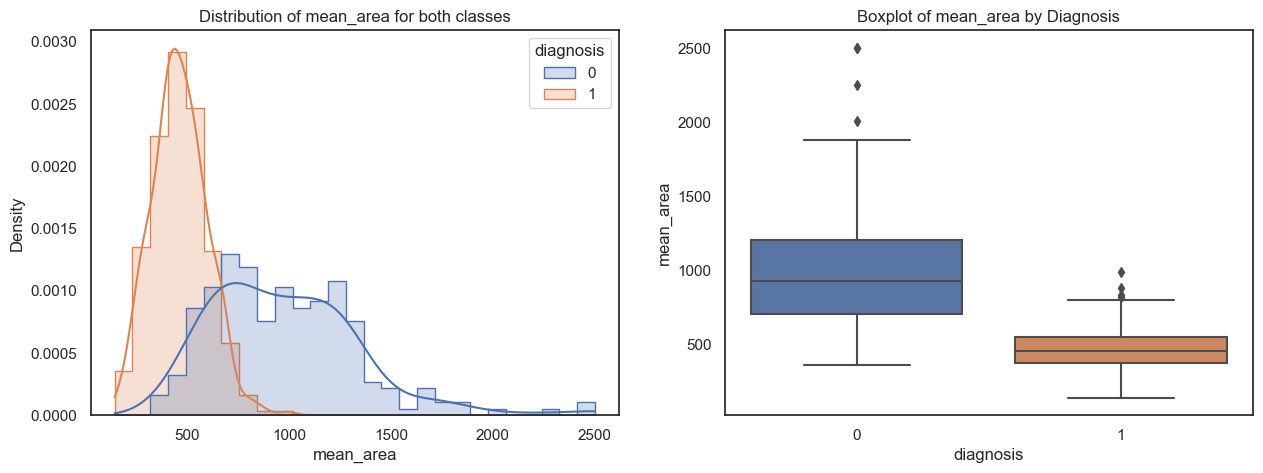


Values for mean_area by Diagnosis:
           count        mean         std    min    25%    50%      75%     max
diagnosis                                                                     
0          212.0  978.376415  367.937978  361.6  705.3  932.0  1203.75  2501.0
1          357.0  462.790196  134.287118  143.5  378.2  458.4   551.10   992.1


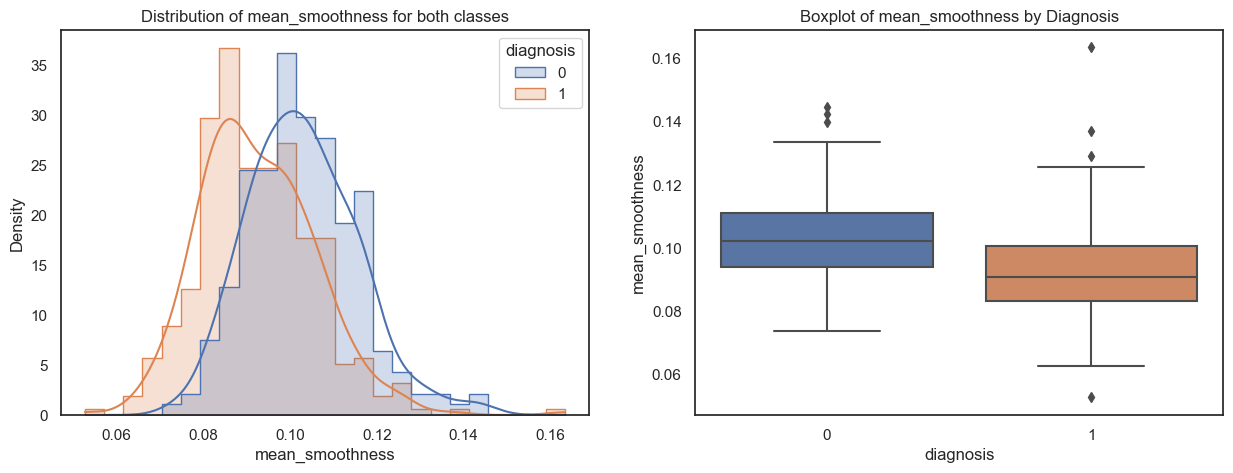


Values for mean_smoothness by Diagnosis:
           count      mean       std      min      25%      50%       75%  \
diagnosis                                                                   
0          212.0  0.102898  0.012608  0.07371  0.09401  0.10220  0.110925   
1          357.0  0.092478  0.013446  0.05263  0.08306  0.09076  0.100700   

              max  
diagnosis          
0          0.1447  
1          0.1634  


In [21]:
# Distribution plots and boxplots for each feature by diagnosis
features = df.columns[:-1]
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Distribution plot
    sns.histplot(df, x=feature, hue='diagnosis', element='step', stat='density', common_norm=False, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {feature} for both classes')

    # Boxplot
    sns.boxplot(x='diagnosis', y=feature, data=df, ax=axes[1])
    axes[1].set_title(f'Boxplot of {feature} by Diagnosis')

    plt.show()

    # Print values
    print(f"\nValues for {feature} by Diagnosis:")
    print(df.groupby('diagnosis')[feature].describe())


# Model

# Splitting the Data

In [23]:
# Assuming df_balanced is your balanced dataset
X = df_balanced.drop('diagnosis', axis=1)
y = df_balanced['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Naive Bayes Model

In [24]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)


GaussianNB()

# Make Predictions

In [25]:
# Predict on the test set
y_pred = nb_model.predict(X_test)


# Results

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        81
           1       0.76      0.92      0.83        62

    accuracy                           0.84       143
   macro avg       0.84      0.85      0.84       143
weighted avg       0.85      0.84      0.84       143


Confusion Matrix:
[[63 18]
 [ 5 57]]


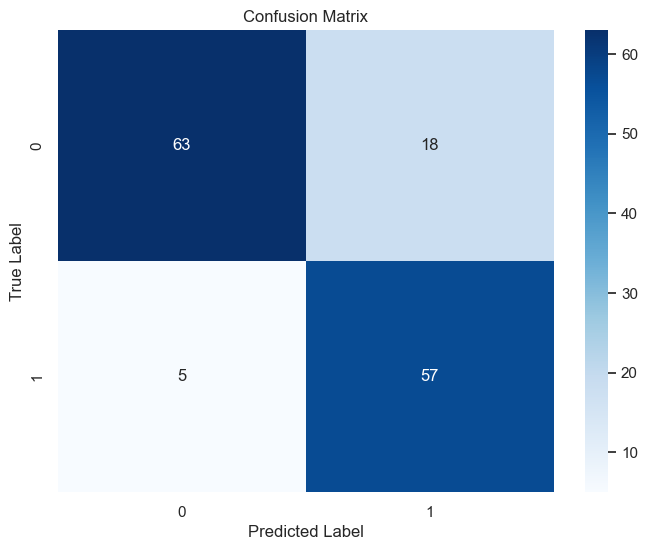

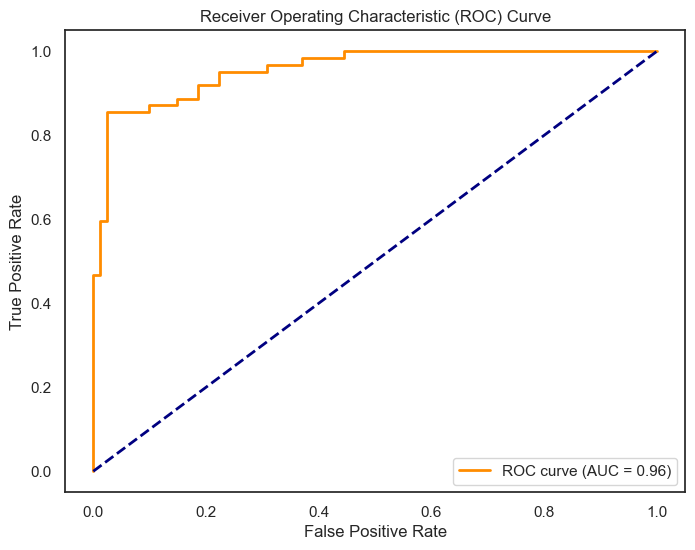

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Additional Metrics: ROC Curve
fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Improving the Model Performance

Best Hyperparameters: {'var_smoothing': 1e-09}
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        81
           1       0.76      0.94      0.84        62

    accuracy                           0.85       143
   macro avg       0.85      0.86      0.85       143
weighted avg       0.86      0.85      0.85       143


Confusion Matrix:
[[63 18]
 [ 4 58]]


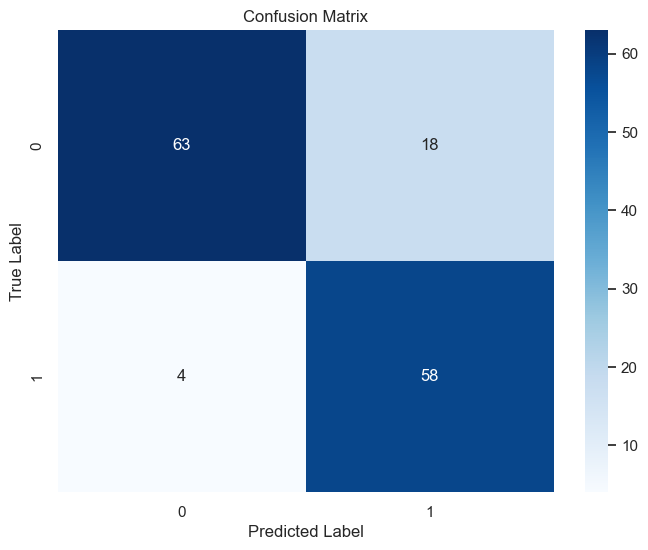

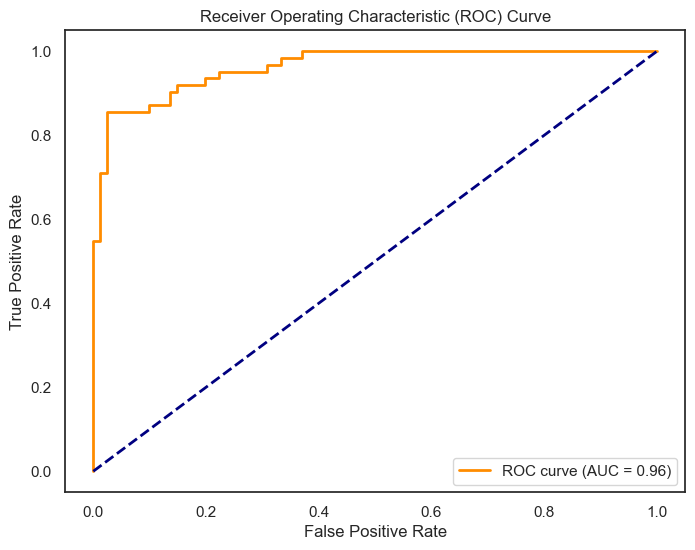

In [33]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Assuming df_balanced is your balanced dataset
X = df_balanced.drop('diagnosis', axis=1)
y = df_balanced['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with Cross-Validation
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
nb_model = GaussianNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_nb_model = grid_search.best_estimator_
best_nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
y_scores = best_nb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest

Random Forest Accuracy: 0.96

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        81
           1       0.97      0.94      0.95        62

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Random Forest Confusion Matrix:
[[79  2]
 [ 4 58]]


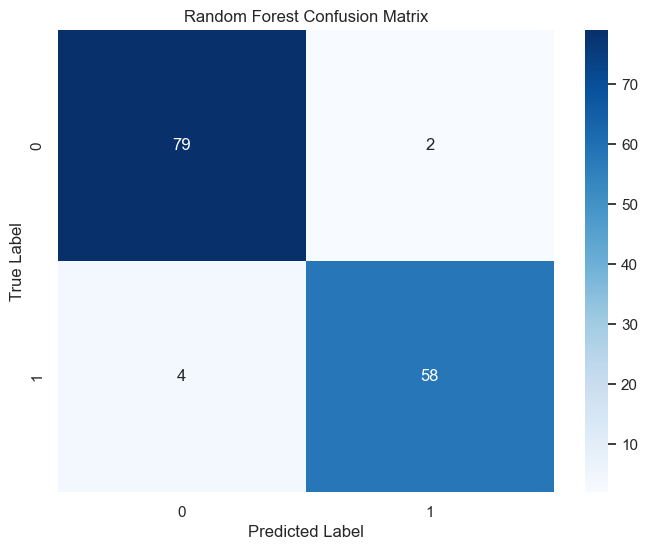

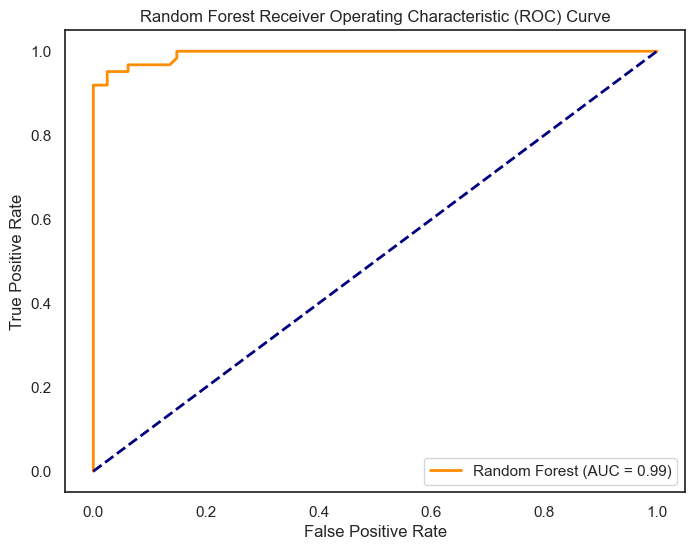

In [34]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Assuming df_balanced is your balanced dataset
X = df_balanced.drop('diagnosis', axis=1)
y = df_balanced['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification Report
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('\nRandom Forest Confusion Matrix:')
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve for Random Forest
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Improve the model

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Improved Random Forest Accuracy: 0.96
Improved Random Forest Accuracy: 0.96

Improved Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        81
           1       0.97      0.94      0.95        62

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Improved Random Forest Confusion Matrix:
[[79  2]
 [ 4 58]]


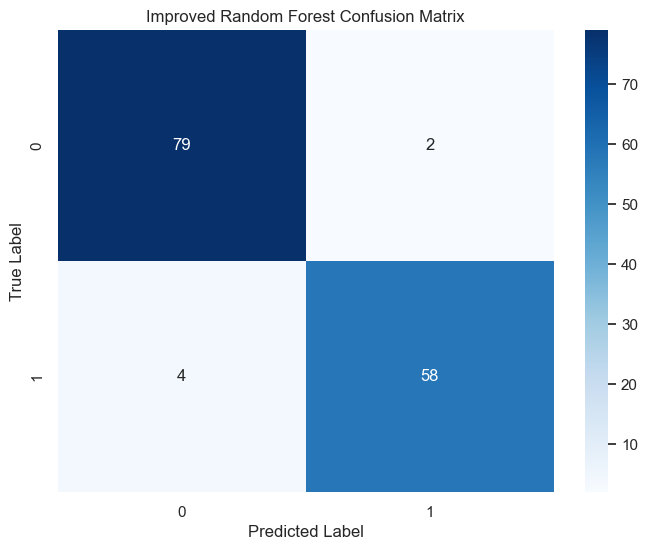

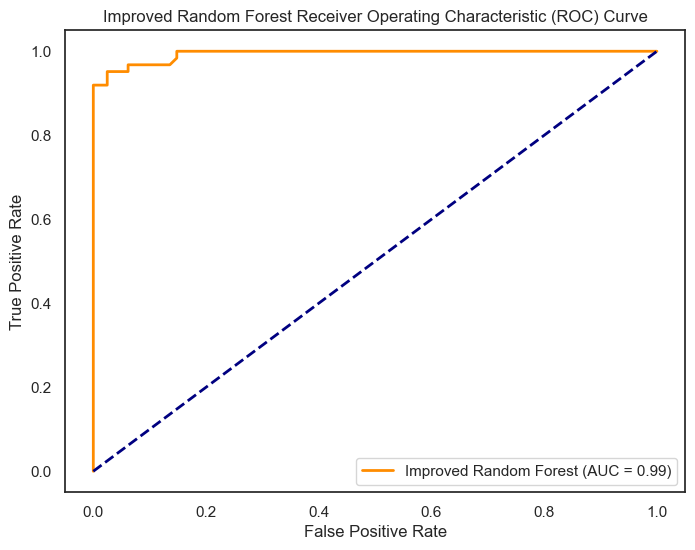

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Improved Random Forest Accuracy: {accuracy_rf:.2f}')

# Additional evaluations (classification report, confusion matrix, ROC curve) can be included as before.

# Evaluate the improved Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Improved Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification Report
print('\nImproved Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('\nImproved Random Forest Confusion Matrix:')
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Improved Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve for the improved Random Forest
y_scores_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Improved Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Improved Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


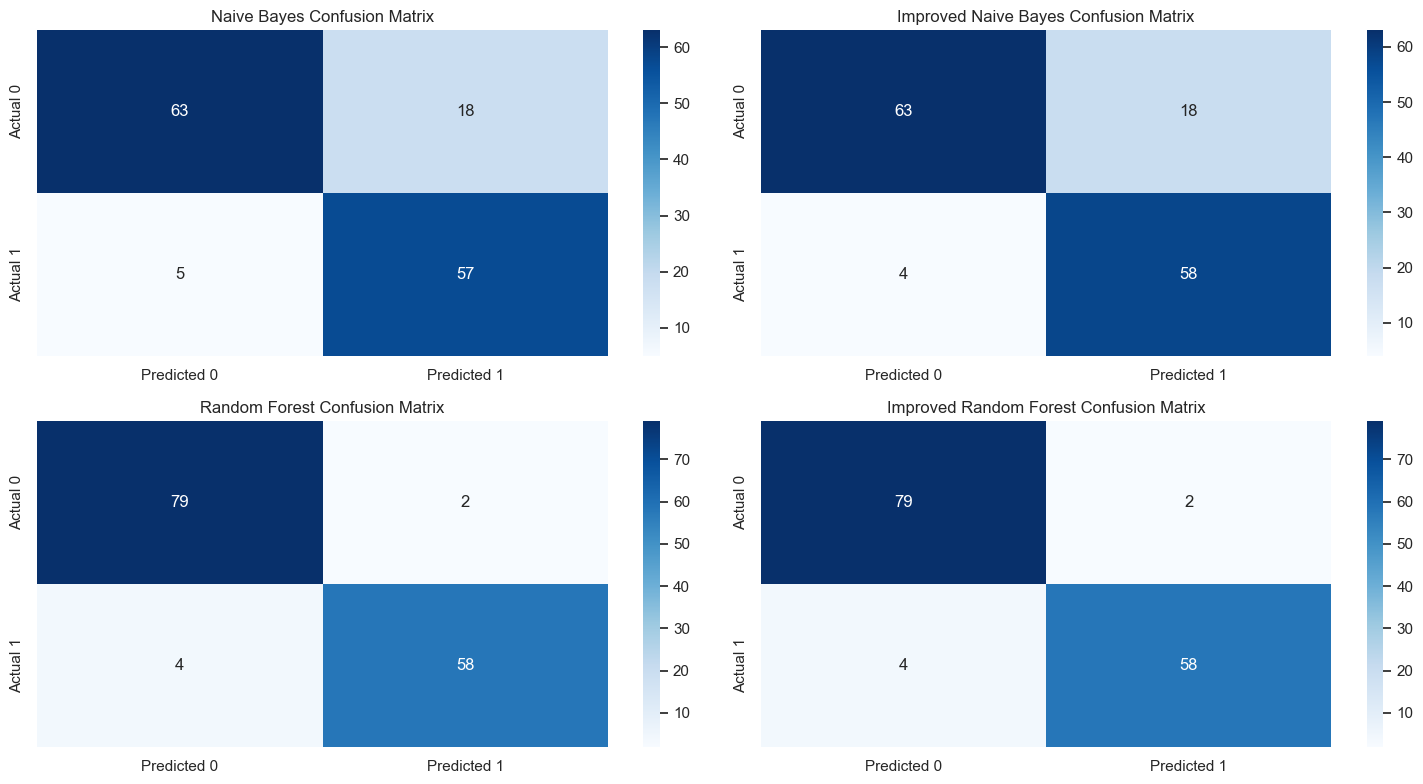

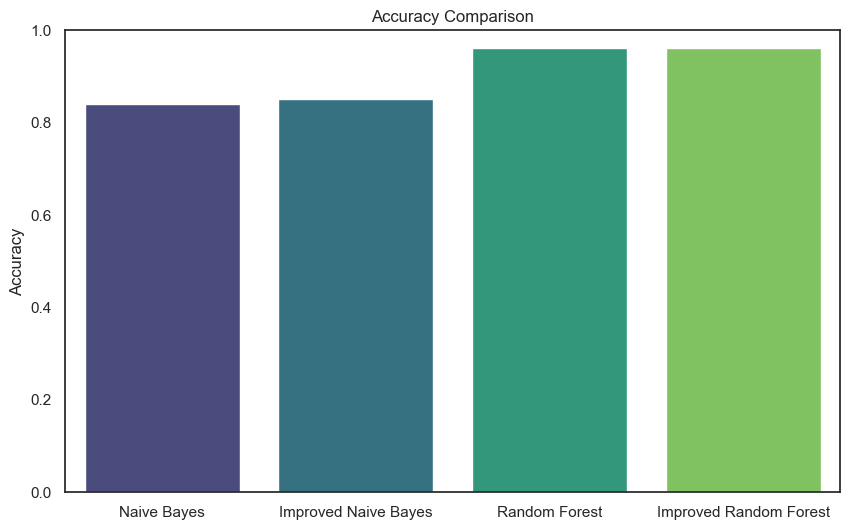

In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Results
results = {
    'Naive Bayes': {
        'Accuracy': 0.84,
        'Confusion Matrix': np.array([[63, 18], [5, 57]])
    },
    'Improved Naive Bayes': {
        'Accuracy': 0.85,
        'Confusion Matrix': np.array([[63, 18], [4, 58]])
    },
    'Random Forest': {
        'Accuracy': 0.96,
        'Confusion Matrix': np.array([[79, 2], [4, 58]])
    },
    'Improved Random Forest': {
        'Accuracy': 0.96,
        'Confusion Matrix': np.array([[79, 2], [4, 58]])
    }
}

# Create DataFrames for Confusion Matrices
confusion_matrices = {
    model: pd.DataFrame(data, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    for model, data in {key: results[key]['Confusion Matrix'] for key in results.keys()}.items()
}

# Visualize Confusion Matrices
plt.figure(figsize=(15, 8))
for i, (model, matrix) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{model} Confusion Matrix')

plt.tight_layout()
plt.show()

# Visualize Accuracy Comparison
models = list(results.keys())
accuracy_values = [results[model]['Accuracy'] for model in models]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_values, palette='viridis')
plt.ylim(0, 1)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
